In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv("D:\Certificates&projects\Ai Microsoft & sprint\Heart_Disease_Project\data\processed.cleveland.data", names=columns, header=None)
df

<>:6: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Specialist\AppData\Local\Temp\ipykernel_1848\2028046367.py:6: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\Certificates&projects\Ai Microsoft & sprint\Heart_Disease_Project\data\processed.cleveland.data", names=columns, header=None)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
df.shape


(303, 14)

In [8]:
df = df.replace("?", np.nan)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [9]:
 #Convert all columns (except target) to numeric
for col in df.columns:
    if col != "target":
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [10]:
df['target'].value_counts()

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [11]:
df['target_bin'] = df['target'].apply(lambda x: 0 if x == 0 else 1)
df['target_bin'].value_counts()

target_bin
0    164
1    139
Name: count, dtype: int64

In [12]:
# Step 1.8: Define numeric and categorical features
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [13]:
df[numeric_features + categorical_features].isna().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
sex         0
cp          0
fbs         0
restecg     0
exang       0
slope       0
ca          4
thal        2
dtype: int64

In [14]:
for col in numeric_features:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
df[numeric_features + categorical_features].isna().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
sex         0
cp          0
fbs         0
restecg     0
exang       0
slope       0
ca          0
thal        0
dtype: int64

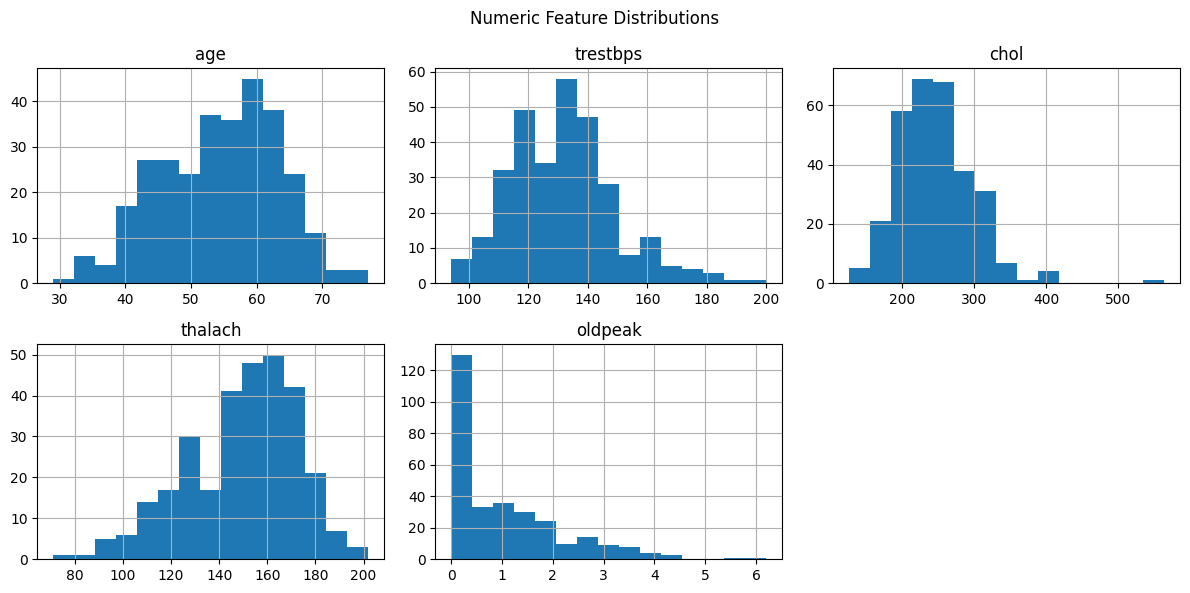

In [16]:
df[numeric_features].hist(bins=15, figsize=(12, 6), layout=(2,3))
plt.suptitle("Numeric Feature Distributions")
plt.tight_layout()
plt.show()

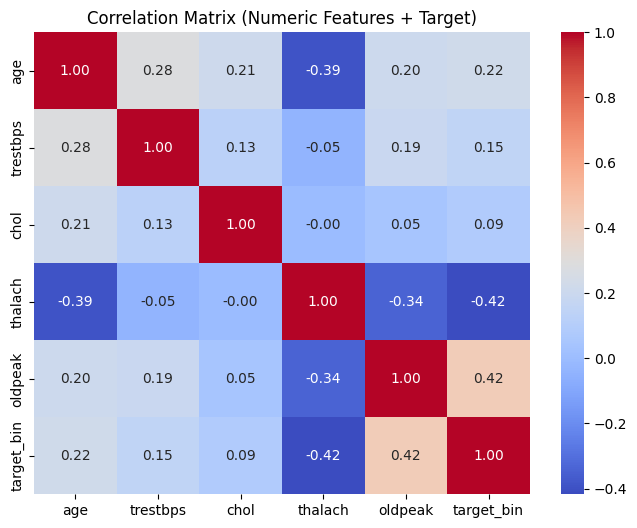

In [17]:
corr_df = df[numeric_features + ["target_bin"]]

plt.figure(figsize=(8,6))
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features + Target)")
plt.show()

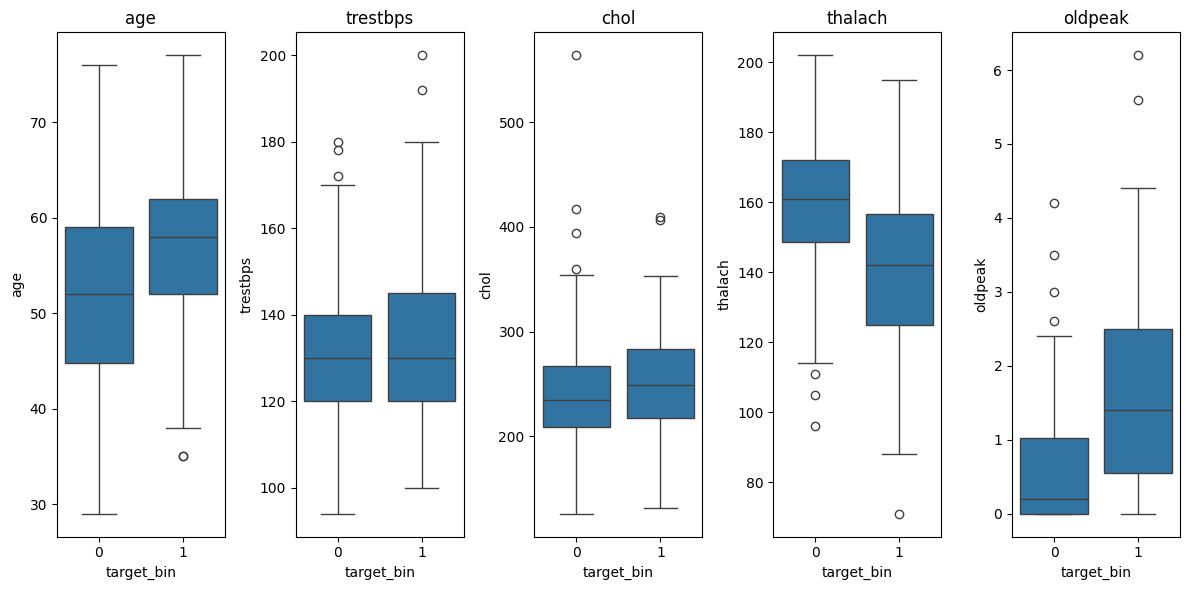

In [18]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.boxplot(x=df['target_bin'], y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [19]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

df_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,target_bin,sex_1.0,cp_2.0,cp_3.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,0,True,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67.0,160.0,286.0,108.0,1.5,2,1,True,False,False,...,False,True,True,True,False,False,False,True,False,False
2,67.0,120.0,229.0,129.0,2.6,1,1,True,False,False,...,False,True,True,True,False,False,True,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0,0,True,False,True,...,False,False,False,False,True,False,False,False,False,False
4,41.0,130.0,204.0,172.0,1.4,0,0,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

df_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,target_bin,sex_1.0,cp_2.0,cp_3.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,0,True,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2,1,True,False,False,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,1,True,False,False,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,0,True,False,True,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,0,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [21]:
df_encoded.to_csv("../data/heart_disease_cleaned.csv", index=False)
print("Cleaned dataset saved to /data/heart_disease_cleaned.csv")

Cleaned dataset saved to /data/heart_disease_cleaned.csv
